# Increasing Students Selecting STEM Majors
#### Lauren Phipps

## Overview <a id="Overview"></a>

insert overview here


[1. Business Problem](#Business-Problem)

[2. Data Understanding](#Data-Understanding)

[3. Data Preparation](#Data-Preparation)

[4. Exploratory Data Analysis](#EDA)

[5. Modeling](#Modeling)

[6. Evaluation](#Evaluation)

[7. Conclusion](#Conclusion)

***

## Business Problem <a id="Business-Problem"></a>
##### [(back to top)](#Overview)

In 2020 alone, the Department of Education invested $578 million to support STEM (science, technology, engineering, and math) education programs. As the number of STEM jobs is growing at a rate that far exceeds non-STEM jobs (10.2% vs. 5.2%, respectively, from 2009-2015), it is becoming increasingly pressing and important have a substantial number of qualified candidates for these jobs. Over 90% of jobs in STEM require a college degree (Associate's degree or higher), so filling these roles means preparing students to pursue a STEM major in college. It is important to understand what factors and high school science experiences influence a student's decision to major in STEM, in order to know how to best invest this money. This project aims to determine these factors, with an additional focus on underrepresented groups in STEM. Underrepresented groups in STEM are people who identify as female, as well as people who are Black, Hispanic, Pacific Islander,  or Indiginous American. 
***

## Data Understanding <a id="Data-Understanding"></a>
##### [(back to top)](#Overview)

The data in this project comes from the 2009 High School Longitudinal Study from the National Center for Education Statistics within the United State Department of Education. The study surveyed over 23,000 students during the fall of their 9th grade year (baseline), two years later in the spring of their 11th grade year (2012), their 12th grade year (2013), and again three years after their expected high school graduation year (in 2016). The study plans to collect data one more time in 2025. The students in this study come form 944 different schools, both public and private, from all states across the United States. Each row in the dataset is a student and each feature a question on the survey.

The project focused on the survey responses from the 2012 survey in order to get a more complete and thorough representation of the student's high school experience, with regards to impressions of science and participation in science activities. The target for the project comes from the 2016 survey, where students indicate whether or not they are enrolled in a STEM major. Only students who responded to the 2016 survey question were included in the modeling data set.  While there are many features included in the dataset, this project focused on the student's attitude towards science, specific experiences related to science (class enrollment, participation in clubs), impression of their science teacher, and their reasoning for taking science classes. 

A full feature list can be found here. The codebook for the categorical values can be found here. 

In [38]:
import custom_functions as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import plotly
import plotly.figure_factory as ff
from plotly.offline import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', 300)

df = cf.import_it('data-files/HSLS/hsls_17_student_pets_sr_v1_0.csv')
df.head(5)

,X2SEX,X2RACE,X2DUALLANG,X2POVERTY185,X2SESQ5_U,X2STU30OCC_STEM1,X2STUEDEXPCT,X2S2SSPR12,X2CONTROL,X2LOCALE,X2REGION,X4RFDGMJSTEM,X4RFDGMJ123,S2APSCIENCE,S2IBSCIENCE,S2SSPR12,S2LIFES12,S2BIO1S12,S2BIO2S12,S2APBIOS12,S2IBIOS12,S2ANATOMYS12,S2OTHBIOS12,S2CHEM1S12,S2CHEM2S12,S2APCHEM12,S2IBCHEM12,S2EARTHS12,S2APENVS12,S2OTHENVS12,S2PHYSIC1S12,S2PHYSIC2S12,S2APPHYSIC12,S2IBPHYSIC12,S2PHYSS12,S2TECHS12,S2OTHPHYS12,S2INTGS1S12,S2INTGS2S12,S2GENS12,S2COMPAPP12,S2COMPPROG12,S2APCOMPSCI12,S2IBTECH12,S2OTHCOMP12,S2ENGINEER12,S2OTHS12,S2OTHS12SP,S2HISCIENCE12,S2STOOKBEFORE,S2SENJOYS,S2SCHALLENGE,S2SHSREQ,S2SCLGADM,S2SCLGSUCC,S2SCAREER,S2SCNSLREC,S2STCHRREC,S2SPARREC,S2SFAMREC,S2SEMPREC,S2SFRIEND,S2SDOWELL,S2SASSIGNED,S2STCHTREAT,S2STCHINTRST,S2STCHEASY,S2STCHTHINK,S2STCHGIVEUP,S2SENJOYING,S2STEXTBOOK,S2SWASTE,S2SSKILLS,S2STESTS,S2SBORING,S2SASSEXCL,S2HSPLAN,S2SUBMITPLAN,S2SPERSON1,S2SPERSON2,S2SLEARN,S2SBORN,S2SUSELIFE,S2SUSECLG,S2SUSEJOB,S2SCLUB,S2SCOMPETE,S2SSUMMERPRG,S2SGROUP,S2STUTORED
0,1,8,1,0,5,0,10,1,1,4,2,1,3,1,-7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,9,-7,1,1,0,0,1,1,0,0,0,0,0,1,1,0,3,1,1,1,2,2,2,3,1,1,3,1,2,-7,2,2,2,3,1,1,1,0,0,0,0,0
1,2,8,1,1,2,0,8,1,1,4,1,0,14,-7,-7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,9,-7,0,1,0,1,1,0,1,1,1,1,0,0,1,0,3,3,2,2,2,3,3,3,3,3,2,1,1,1,3,3,2,1,2,2,2,0,0,0,0,0
2,2,3,1,0,5,0,12,1,1,2,4,1,8,1,-7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,-5,0,0,-5,-5,10,-7,0,0,1,1,1,0,0,0,1,0,0,0,0,0,3,3,4,1,2,4,4,3,4,4,1,3,2,-7,4,4,2,2,4,2,1,0,0,0,0,0
3,2,8,1,1,2,-8,-8,-8,1,2,3,-7,-7,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-5,-8,-8,-8,-8,-8,-8,-8,-5,-8,-8,-5,-5,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
4,1,8,1,0,5,0,9,0,1,1,3,-7,-7,-7,-7,0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-5,-7,-7,-7,-7,-7,-7,-7,-5,-7,-7,-5,-5,-7,0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-9,-9,1,-9,-9,-9,-9,2,-7,1,-9,-9,-9,1,-9,-9,0,0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Data columns (total 90 columns):
X2SEX               23503 non-null int64
X2RACE              23503 non-null int64
X2DUALLANG          23503 non-null int64
X2POVERTY185        23503 non-null int64
X2SESQ5_U           23503 non-null int64
X2STU30OCC_STEM1    23503 non-null int64
X2STUEDEXPCT        23503 non-null int64
X2S2SSPR12          23503 non-null int64
X2CONTROL           23503 non-null int64
X2LOCALE            23503 non-null int64
X2REGION            23503 non-null int64
X4RFDGMJSTEM        23503 non-null int64
X4RFDGMJ123         23503 non-null int64
S2APSCIENCE         23503 non-null int64
S2IBSCIENCE         23503 non-null int64
S2SSPR12            23503 non-null int64
S2LIFES12           23503 non-null int64
S2BIO1S12           23503 non-null int64
S2BIO2S12           23503 non-null int64
S2APBIOS12          23503 non-null int64
S2IBIOS12           23503 non-null int64
S2ANATOMYS12        23503 non-

## Data Preparation <a id="Data-Preparation"></a>
##### [(back to top)](#Overview)

Because the dataset is a follow up to a baseline survey, some of the initial respondents did not participate in this follow up survey. This was seen as a `'-8': Unit Non-Response` and these 2,909 rows were dropped since all answers were blank. As it is a survey, the majority of the data cleaning involved handling null values, which were coded as negative values depending on if they were declared N/A and skipped legitimately or left blank. As the features were turned into binary, dummy variables with a positive being `'1'` and all other values being `'0'`, the null values were coded to `'0'`. 

To consolidate the list of science class options, I created new features that grouped them into: `bio`, `chem`, `physics`, `engineering`, `environmental science`, `computer science`, and `miscellaneous` (for classes such as "general science"). Additionally, the features that were presented as a likert scale were converted to a simple agree/disagree to better align with the other binary variables. 

Lastly, in order to map to the target variable, the student must have responded to the 2016 survey question that asks if they are pursuing a STEM major. Students who did not respond with a yes or no were dropped from the dataframe used in modeling. They were included in any exploratory analysis done within the 2012 survey; however, any analysis done with ties to the target variable does not include those students. The modeling dataframe contained 10,974 rows (students).

The complete data cleaning process can be found here. 

***

In [40]:
cf.clean_it(df)

NameError: name 'np' is not defined

## Exploratory Data Analysis <a id="EDA"></a>
##### [(back to top)](#Overview)




***

## Expectations by Gender

In [ ]:
expectations = pd.DataFrame(data = df.groupby('X2SEX')['EXPECT'].value_counts(normalize = True)).unstack()
expectations = expect.unstack()
expectations.columns = ['No HS Diploma', 'HS Diploma', 'Certificate', 'Associate Degree', 'Bachelor Degree', 'Masters Degree', 'PhD', 'Unsure']
expectations.index = ['Male', 'Female']

x,y = np.meshgrid(expectations.columns, expectations.index)
expectations *= 2

plt.figure(figsize = (2, 7))
plt.scatter(x=y.flatten(), y=x.flatten(), s=expectations.values.flatten(), c = expectations.values.flatten(),  cmap= 'Blues')
plt.colorbar()
plt.margins(0.5, 0.1)
plt.show()

## Expectations by Race

In [ ]:
race_expectations = pd.DataFrame(data = df.groupby('X2RACE')['EXPECT'].value_counts(normalize = True)).unstack()
race_expectations = race_expect.unstack()
race_expectations.columns = ['No HS Diploma', 'HS Diploma', 'Certificate', 'Associate Degree', 'Bachelor Degree', 'Masters Degree', 'PhD', 'Unsure']
race_expectations.index = ['American Indian/Alaska Native', 'Asian', 'Black/African American', 'Hispanic', 'Multiple Races', 'Native Hawaiian/Pacific Islander', 'White']

x,y = np.meshgrid(race_expectations.columns, race_expectations.index)
race_expectations *= 0.85

plt.figure(figsize = (8, 8))
plt.scatter(x=y.flatten(), y=x.flatten(), s=race_expectations.values.flatten(), c = race_expectations.values.flatten(),  cmap= 'Blues')
plt.xticks(rotation=75)

plt.margins(0.1, 0.1)
plt.show()

Important for showing who expects to pursue college and higher degrees are more prevalant in STEM professions

## Students Who Expect to Have STEM Career vs Majoring in STEM

In [41]:
stem_career = pd.DataFrame(data = modeling_df.X2STU30OCC_STEM1.value_counts(normalize = True).values, index = modeling_df.X2STU30OCC_STEM1.value_counts(normalize = True).index, columns = ["2009"])
stem_major = pd.DataFrame(data = modeling_df.target.value_counts(normalize = True).values, index = modeling_df.target.value_counts(normalize = True).index, columns= ['2016'])

difference_in_expectations = pd.concat([stem_career, stem_major], axis = 1).T
yes_STEM = difference_in_expectations[1].values

fig, ax = plt.subplots(figsize = (7, 5))
ax.bar(['Expects to Have a STEM at 30 (2009)', 'Pursuing STEM Major (2016)'], yes_STEM)
ax.set_ylabel('Percentage of Students')
ax.set_title('Percentages of Students Interested in STEM by Year');

NameError: name 'modeling_df' is not defined

## Gender Distribution of STEM vs non STEM

NameError: name 'male_target' is not defined

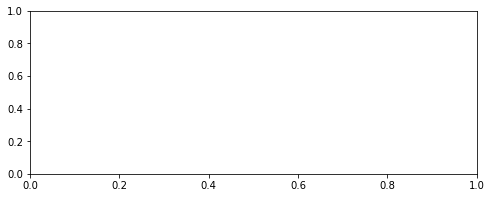

In [18]:
#create dataframe of groupby object
target_gender = pd.DataFrame(modeling_df.groupby(by = ['target'])['X2SEX'].value_counts(normalize = True))
#change name of column to value to not confused with target variable
target_gender.rename(columns = {'X2SEX':'value'}, inplace = True)
#change multindex to individual columns
target_gender.reset_index(inplace=True, level = ('target', 'X2SEX'))

males_stem = target_gender[target_gender['X2SEX'] == 1]['value'].values
females_stem = target_gender[target_gender['X2SEX'] == 2]['value'].values


label = ['Non-STEM', 'STEM']
fig = plt.figure(figsize = (8, 3))
ax = fig.add_subplot(111)
ax.barh(label, male_stem, align='center', color='skyblue',label='Males')
ax.barh(label, female_stem, align='center', left=male_stem, color='purple',label='Females')
ax.set_yticks(label)
ax.set_xlabel('Percentage')
ax.set_title('Gender Distribution of STEM vs Non-STEM Majors')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

## Students Who See Themselves as Science People

In [ ]:
#create dataframe of groupby object
person_demo = pd.DataFrame(modeling_df.groupby(by = ['X2RACE','X2SEX'])['S2SPERSON1'].value_counts(normalize = True))
#change name of column to value to not confused with target variable
person_demo.rename(columns = {'S2SPERSON1':'value'}, inplace = True)
#change multindex to individual columns
person_demo.reset_index(inplace=True, level = ('X2RACE', 'X2SEX', 'S2SPERSON1'))
#change 1/2 to male/female labels
person_demo['X2SEX'] = person_demo['X2SEX'].map({1: 'Male', 2: 'Female'})
#isolate only students choosing a stem major
person_demo = person_demo[person_demo['S2SPERSON1'] != 0]


plt.figure(figsize = (10, 7))
sns.barplot(x = 'X2RACE', y = 'value', hue = 'X2SEX', data = person_demo, palette = {'Male':'skyblue', 'Female':'purple'})
plt.xlabel('Race/Ethnicity')
plt.ylabel('Sees Self as Science Person') 
plt.title('Percentage of Students Who See Themselves as Science Person by Race and Gender')
plt.xticks(ticks = range(0,8), rotation = 75, labels = ['American Indian/Alaska Native', 'Asian', 'Black/African American', 'Hispanic', 'Multiple Races', 'Native Hawaiian/Pacific Islander', 'White'])
plt.legend(title = 'Gender', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
;


## Coefficients Ranked

In [ ]:
coef_model = dict(zip(list(features), list(abs(lr_gs.coef_[0]))))
viz_dict = sorted(coef_model.items(), key=lambda kv: kv[1])
viz_dict.reverse()

top_ten = viz_dict[:10]
coefs_df = pd.DataFrame(data = top_ten, columns = ['feature', 'coefficient_value'])

plt.figure(figsize = (10,10))
clrs = ['red' if x == 'female' else 'red' if x == 'black' else 'red' if x== 'misc_class' else 'skyblue' for x in coefs_df['feature']]
ax = sns.barplot(x ='coefficient_value', y = 'feature', data = coefs_df, palette = clrs, orient = 'horiz' )
plt.yticks(ticks = range(0,11), labels = ['Female', 'Engineering Class', 'Asian', 'Plans to Pursue STEM', 'Taking Computer Science Class', 'Participated in Science Summer Program', 'Black', 'Thinks STEM is Useful for Job', 'Taking Misc Science Class', 'Sees Self As Science Person'])
plt.margins(0.1, 0.02)
ax.set_ylabel('Feature')
ax.set_xlabel('Coefficient Value (Absolute Value)')

;

## Modeling <a id="Modeling"></a>
##### [(back to top)](#Overview)

***

## Evaluation <a id="Evaluation"></a>
##### [(back to top)](#Overview)



## Conclusion <a id="Conclusion"></a>
##### [(back to top)](#Overview)